# Classification task using a perceptron

Create a dataset with three classes, each class has N objects, represented by two variables X1 and X2 according to the following requirements:

+ N is equal to 100
+ X1 is distributed:
    1. for class 1, a normal distribution with mean -1 and standard deviation 0.5
    2. for class 2, a normal distribution with mean 2.5 and standard deviation 1
    3. for class 3, a normal distribution with mean 4 and standard deviation 1
+ X2 is distributed:
    1. for class 1, an exponential distribution with scale parameter 3
    2. for class 2, a lognormal distribution with mean 0.5 and standard deviation 0.5
    3. for class 3, a Poisson distribution with lambda 2.0 plus a constant equal to 5

Each object has a label y attached (1, 2, or 3).

## Plot the points

In [152]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
np.random.seed(123)

X1_1 = np.random.normal(loc=-1, scale=0.5, size=N)
X1_2 = np.random.normal(loc= 2.5 , scale= 1 , size=N) 
X1_3 = np.random.normal(loc=4, scale=1, size=N)

X2_1 = np.random.exponential(scale=3, size=N)
X2_2 = np.random.lognormal(mean=0.5,sigma=0.5 ,size= N)
X2_3 = np.random.poisson(lam= 2,size=N) + 5


#creo i vettori label
y1=np.ones(N)
y2=np.ones(N)*2
y3=np.ones(N)*3

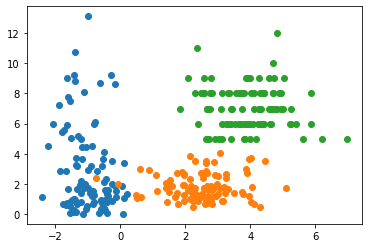

In [153]:
#faccio i plot delle varie distrubuzioni

plt.scatter(X1_1,X2_1)
plt.scatter(X1_2,X2_2)
plt.scatter(X1_3,X2_3)

## Create data matrix

Create a matrix of points X (each row is an object) and a vector y of labels. Remember that we need the coordinate X0 for the bias term (all ones).

In [154]:
#bias term vector 
X0= np.ones(N*3)

X = np.stack((X0,
    np.concatenate((X1_1,X1_2,X1_3)),
    np.concatenate((X2_1,X2_2,X2_3))),
    axis=1) 

y=np.concatenate((y1,y2,y3))

## Choose category 

We want to train a binary classifier for class 3. To this purpose, create a vector of labels y_class that contains 1 for each object belonging to the class under study (positive class) and -1 to all the other objects.


In [155]:
positive_class=3

y_class = -np.ones(N*3)
y_class[y==positive_class]=1

### Plot this binary problem

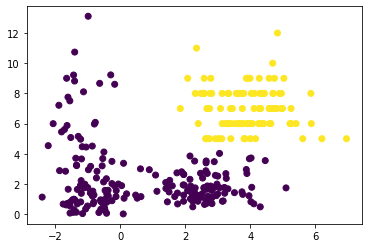

In [156]:
plt.scatter(X[:,1], X[:,2], c=y_class) 

## Define the Sum of squares error function

Write the function sse(X, y, w) that takes the data matrix X, the labels y, and the vector of paraterers w and computes the error in terms of sum of squares.

In [157]:
def sse(X, y, w):
    error = np.sum(np.square(y-np.dot(X,w)))/2#sum of squares error 
    return error

## Train the perceptron with a mini-batch stochastic gradient descent

Set the values of the vector of parameters w with values drawn from a uniform distribution within the range \[-1. 1\].
Use a learning parameter eta equal to 1e-5 and a batch size of 10 objects. Set the maximum number of epochs to 100.
Save in the vector sse_epoch, the values of the sum of squares error for each epoch. Save in the vector errors_epoch, the number of objects misclassified at each epoch.
Remember to shuffle the dataset at each epoch.

[164. 104. 115. 115. 105.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.]


/var/folders/p7/spkm18x575v6mlwyqx6xlyb40000gp/T/ipykernel_1271/657133623.py:2: RuntimeWarning: overflow encountered in square
  error = np.sum(np.square(y-np.dot(X,w)))/2#sum of squares error


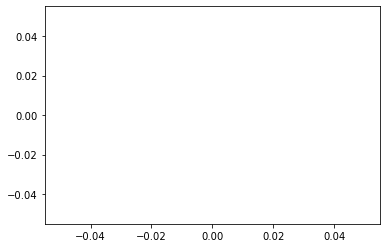

In [158]:
w= np.random.uniform(low=-1,high=1 , size =3)

mini_batch_size= 10 
max_epoch = 100
epoch= 0 

eta = 1e-5

#mi creo i vettori per salvare gli errori
sse_epoch = np.zeros(max_epoch+1)

#set checkpoint 
errors_epoch = np.zeros(max_epoch+1)

for epoch in range(max_epoch) :
    sse_epoch[epoch] = sse(X, y_class, w)
    errors_epoch[epoch] = sum((y_class * np.sign(np.dot(X, w))) <0) #ho errore solo quando i segni sono discordi 

    #faccio le permutazioni di X
    perm = np.random.permutation(range(y_class.shape[0]))
    X=X[perm, :]
    y_class = y_class[perm]

    for j in range(0, y_class.shape[0], mini_batch_size): #parto da 0 e vado a 100 facendo passi da 10 
       
        #faccio un trim delle classi di analisi 
        X_batch = X[j:(j+mini_batch_size)]
        y_batch = y_class[j:(j+mini_batch_size)]
        errors = y_batch - np.dot(X_batch, w)
       
        w = w + eta + np.dot(X_batch.T,errors)

#errori dell'ultima epoca
sse_epoch[epoch+1]= sse (X, y_class, w)
errors_epoch[epoch+1] = sum((y_class * np.sign(np.dot(X, w)))<0)

print (errors_epoch)

plt.plot([np.min(X[:,1]),np.max(X[:,1])],[np.min(X[:,1])*(-w[1]/w[2])-(w[0]/w[2]),np.max(X[:,1])*(-w[1]/w[2])-(w[0]/w[2])])


## Plot number of errors per epoch

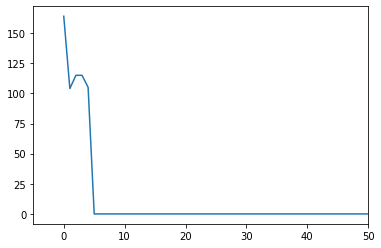

In [159]:

plt.plot(errors_epoch)
plt.xlim(right=50)
plt.show()

# Polynomial regression task

In this exercies, we will reuse the coordinate X1 to create a regression problem. The output Y (the "oracle" target function) is a cubic function aX^3 + bX^2 + cX + d with values a = -1, b = 2, c = -3, d = 4. Moreover, we sum some randome noise with a gaussian distribution (mean zero, standard deviation 2.5).

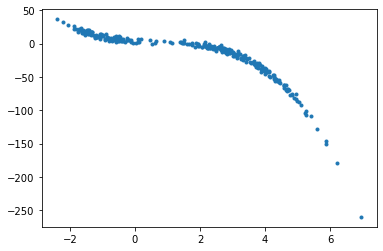

In [160]:
a = -1 
b = 2,
c = -3
d = 4

disturbo = np.random.normal(loc=0, scale=2.5, size= N*3)
#mi creo X1
X1 = np.concatenate([X1_1,X1_2,X1_3])
#oracle function
Y = a*X1**3 + b*X1**2 + c*X1 +d+ disturbo
Y_C= Y
plt.plot(X1, Y,'.')

## Create data matrix
Suppose that your hypohtesis is a quadratic function, generate the data matrix accordingly (remember the X0) and save it into the variable X_reg.

In [161]:
X0 = np.ones(N*3)
X_reg = np.stack([X0,X1,X1**2],axis=1)

## Find the optimal vector of parameters
In this case, we will try to find the optimal w using the closed form.

In [162]:
w= np.random.uniform(low= -1, high=-1, size=3)

#parametri 
mini_batch_size=3
eta = 1e-4
max_epoch = 10000

total_error=np.zeros(max_epoch+1)
errors_epoch = np.zeros(max_epoch+1)

def error_w (X,y,w):
    error = np.sum(np.square(y-np.dot(X,w))) / 2.0
    return error

for epoch in range(max_epoch):

    perm = np.random.permutation(range(N*3))
    X = X[perm,:]
    Y = Y[perm]
    for j in range(0,N*3,mini_batch_size):
        X_batch = X[j:(j+mini_batch_size),:]
        y_batch = Y[j:(j+mini_batch_size)]
        errore = y_batch - np.dot(X_batch,w)
        w = w + eta*(np.dot(np.transpose(X_batch),errore))



## Check the curvature of the solution

Why does this solution look like a line? Try to plot the parabola and think about the reasons of this shape.

[-16.73485735  -0.90393978   0.77626698]


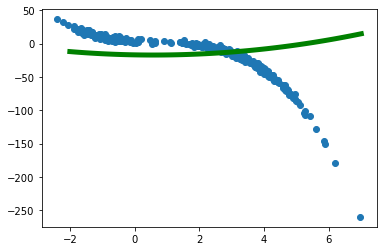

In [163]:
# genero dei punti per plottare la linea
x_grid = np.linspace(-2, 7, 100) 

# plot line
plt.scatter(X1,Y_C)

plt.plot(x_grid, w[0] + x_grid * w[1] + x_grid**2 * w[2],c='g', linewidth=5)

print(w)